In [18]:
import pandas as pd

df = pd.read_csv(
    'data\meta5years.csv',
    parse_dates=['Date'],
    index_col="Date",
).rename(columns={
    'Close/Last': 'close',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Volume': 'volume',
}).sort_index()

df

,close,volume,open,high,low
Date,,,,,
2018-05-17,$183.76,14695830,$182.68,$184.06,$182.22
2018-05-18,$182.68,13066220,$183.49,$184.19,$182.61
2018-05-21,$184.49,13078810,$183.77,$185.30,$183.13
2018-05-22,$183.80,12267860,$184.93,$185.42,$183.43
2018-05-23,$186.90,16594310,$182.50,$186.91,$182.18
...,...,...,...,...,...
2023-05-10,$233.08,19119010,$236.17,$236.75,$230.72
2023-05-11,$235.79,20448990,$233.05,$238.21,$232.30
2023-05-12,$233.81,16161450,$236.74,$236.9599,$231.45


In [19]:
def remove_dollar_sign(x: str) -> float:
    return float(x[1:])

df = df.assign(
    close=df['close'].map(remove_dollar_sign),
    open=df['open'].map(remove_dollar_sign),
    high=df['high'].map(remove_dollar_sign),
    low=df['low'].map(remove_dollar_sign),
)

df

,close,volume,open,high,low
Date,,,,,
2018-05-17,183.76,14695830,182.68,184.0600,182.22
2018-05-18,182.68,13066220,183.49,184.1900,182.61
2018-05-21,184.49,13078810,183.77,185.3000,183.13
2018-05-22,183.80,12267860,184.93,185.4200,183.43
2018-05-23,186.90,16594310,182.50,186.9100,182.18
...,...,...,...,...,...
2023-05-10,233.08,19119010,236.17,236.7500,230.72
2023-05-11,235.79,20448990,233.05,238.2100,232.30
2023-05-12,233.81,16161450,236.74,236.9599,231.45


In [22]:
df = df.assign(
    close_mean = df['close'].rolling('14D').mean()
)
df

,close,volume,open,high,low,close_mean
Date,,,,,,
2018-05-17,183.76,14695830,182.68,184.0600,182.22,183.760000
2018-05-18,182.68,13066220,183.49,184.1900,182.61,183.220000
2018-05-21,184.49,13078810,183.77,185.3000,183.13,183.643333
2018-05-22,183.80,12267860,184.93,185.4200,183.43,183.682500
2018-05-23,186.90,16594310,182.50,186.9100,182.18,184.326000
...,...,...,...,...,...,...
2023-05-10,233.08,19119010,236.17,236.7500,230.72,236.435000
2023-05-11,235.79,20448990,233.05,238.2100,232.30,236.158000
2023-05-12,233.81,16161450,236.74,236.9599,231.45,235.507000


<Axes: xlabel='Date'>

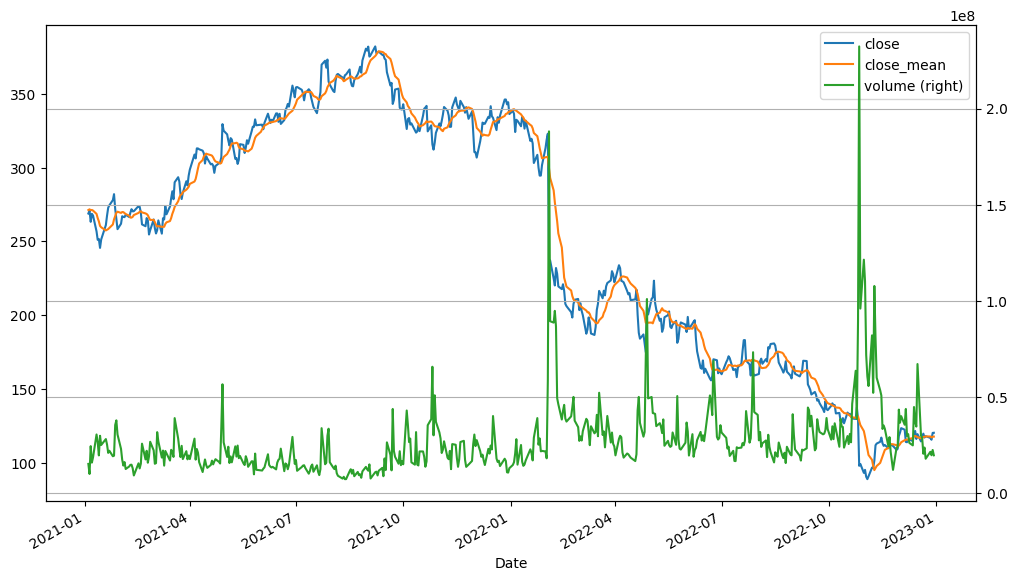

In [25]:
from_ = '2021'
to = '2022'

df[from_:to].plot(
    y=['close', 'close_mean', 'volume'],
    figsize=(12, 7),
    grid=True,
    secondary_y=['volume'],
)